In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('/Users/priyankademla/Desktop/Full time offer search/Stratascratch- Projects/AMAZON_PRICE_PREDICTION_datasets/AMZN_train.csv')

In [4]:
df_train.shape

(4781, 7)

The volume of training data is 4781 records and 7 columns!

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


Panda's info session gives a quick peek into the different column details, the non-null count and data-type. 6 numerical columns and 1 object type (date)! No null values at all and just 261 KB in size!

In [6]:
df_train.describe() #the describe function works only for numerical columns so we need to call date (object) separately

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [7]:
df_train['Date'].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [8]:
df_train['Date'].min(), df_train['Date'].max() #so training dataset is from 1997 to 2016 and 4781 sessions

('1997-05-15', '2016-05-13')

In [9]:
from matplotlib import pyplot as plt 

plt.rcParams["figure.figsize"] = (12,9)

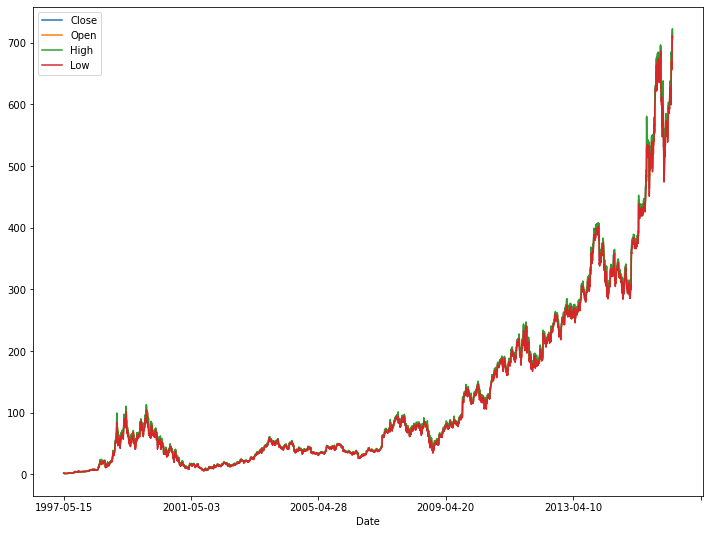

In [10]:
_ = df_train.plot(x="Date",y=["Close","Open","High","Low"])

#usually useful for representing financial data - as it changes over time

Let us perform the same data exploration for test and validation datasets, so as to ensure that they follow the same distribution and there are no surprising errors there. Let's create a function to do that.

In [11]:
def analyse(dataframe):
    """Runs an exploratory analysis of the dataframe."""
    print("Shape",dataframe.shape,'\n')
    print("Column Details:",dataframe.columns,"\n")
    dataframe.info()
    print("\n",dataframe.describe(),"\n")
    print("The data ranges from:",dataframe['Date'].min(),"to",dataframe['Date'].max())
    dataframe.plot(x='Date',y=['Open','Close','High','Low'])

In [12]:
df_test = pd.read_csv("/Users/priyankademla/Desktop/Full time offer search/Stratascratch- Projects/AMAZON_PRICE_PREDICTION_datasets/AMZN_test.csv")

Shape (504, 7) 

Column Details: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.95

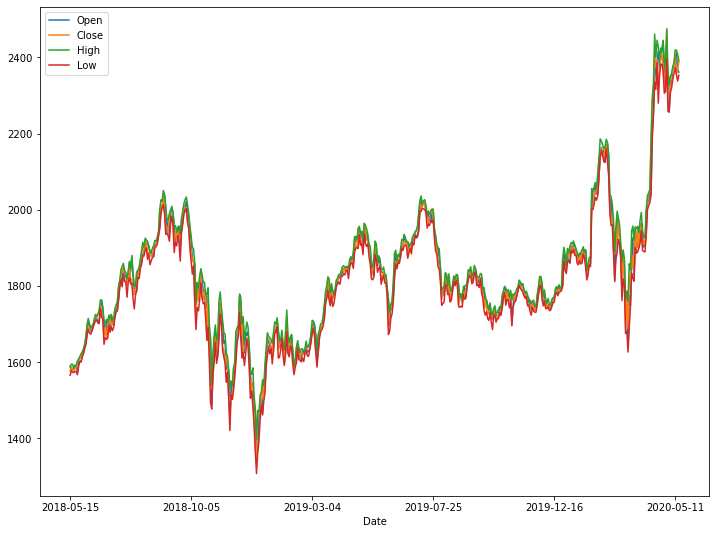

In [13]:
analyse(df_test)

The test data ranges from 2018 to 2020 with 504 records!

In [14]:
df_validation = pd.read_csv("/Users/priyankademla/Desktop/Full time offer search/Stratascratch- Projects/AMAZON_PRICE_PREDICTION_datasets/AMZN_val.csv")

Shape (503, 7) 

Column Details: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.35

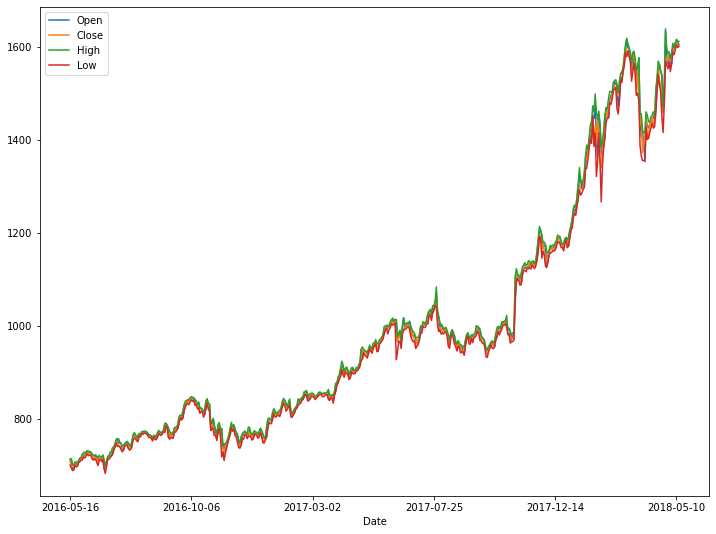

In [15]:
analyse(df_validation)

The validation dataset ranges from 2016 to 2018 with 503 records!

Predictive Modelling Part - To predict whether next day's stock price would be higher than the previous day's price

In [16]:
#Just compare opening price with closing prices one day in advance; Step 1 is to ensure that data is sorted by date

df_train.sort_values(by='Date',inplace=True)
df_test.sort_values(by='Date',inplace=True)
df_validation.sort_values(by='Date',inplace=True)

In [17]:
#Next step is to shift the dataframe by one row/one day AND compare the prices. Can use the shift function in pandas!
#Specify a period of -1 because we are shifting the data one day back
#as the second part - logical operation so the answer would be True/False and we want this to be presented as 0/1 for the ML models so we will map it to type 'int'
#new column to be created to store this info

df_train["Target"] = (df_train['Close']>df_train['Open']).shift(periods=-1,fill_value=0).astype(int)

In [18]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [19]:
df_train['Target'].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

Approximately 2392 days when price was higher than previous day whereas 2389 days when prices were lower than the previous day

Repeating the same procedure for validation and testing data set

In [20]:
df_test['Target'] = (df_test["Close"]>df_test['Open']).shift(periods=-1,fill_value=0).astype(int)
df_test['Target'].value_counts()

1    255
0    249
Name: Target, dtype: int64

In [21]:
df_validation['Target'] = (df_validation["Close"]>df_validation["Open"]).shift(periods=-1,fill_value=0).astype(int)
df_validation['Target'].value_counts()

0    255
1    248
Name: Target, dtype: int64

**Feature Engineering**

We know that stock prices are time-dependent and next day's prices are dependent on the n-1 price. Take into account all the values from the past n days and make sure that the trend/magnitude of price change is captured.

Simple solution is to calculate the moving average (using the rolling method). let's calculate the 3-day and 7-day moving average!

In [22]:
df_train['Moving_average_3'] = (df_train['Close'] - df_train['Open']).rolling(window=3,min_periods=1).mean()
df_test['Moving_average_3'] = (df_test['Close']-df_test['Open']).rolling(window=3,min_periods=1).mean()
df_validation['Moving_average_3'] = (df_validation['Close']-df_validation['Open']).rolling(window=3,min_periods=1).mean()

In [23]:
df_train['Moving_average_7'] = (df_train['Close']-df_train['Open']).rolling(window=7,min_periods=1).mean()
df_test['Moving_average_7'] = (df_test['Close']-df_test['Open']).rolling(window=7,min_periods=1).mean()
df_validation['Moving_average_7'] = (df_validation['Close']-df_validation['Open']).rolling(window=7,min_periods=1).mean()

Feature engineering can be simpler also. Can just take current day's price direction or the price range. Anything that comes to mind which might be considered useful, should be tested and tried.

In [24]:
#Price range

df_train['Price_Range'] = df_train['High']-df_train['Low']
df_test['Price_Range'] = df_test['High']-df_test['Low']
df_validation['Price_Range'] = df_validation['High'] - df_validation['Low']

In [25]:
#Price Direction calculation

df_train['Todays_Direction'] = df_train['Close']-df_train['Open']
df_test['Todays_Direction'] = df_test['Close']-df_test['Open']
df_validation['Todays_Direction'] = df_validation['Close']-df_validation['Open']

In [26]:
df_train.sample(10,random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_average_3,Moving_average_7,Price_Range,Todays_Direction
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,3.000000,-1.860001
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,5.419983,4.600007
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,18.010010,-11.729996
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,9.312500,2.125000
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,8.239990,5.829986
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,27.700012,6.890015
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,6.570007,4.199982
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,2.187500,-0.406250
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,2.379997,1.330002
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.083333,0.072917


Next Step - Classical Machine Learning Algos 

Starting with Logistic Regression!

In [27]:
#Target column that we aim to predict 

y_col = "Target"

#input features for the model

X_cols = ["Open",
          "High",
          "Low",
          "Close",
          "Adj Close",
          "Volume",
          "Moving_average_3",
          "Moving_average_7",
          "Todays_Direction",
          "Price_Range"] 

In [28]:
X_train = df_train[X_cols]
Y_train = df_train[y_col]

X_test = df_test[X_cols]
Y_test = df_test[y_col]

X_validation = df_validation[X_cols]
Y_validation = df_validation[y_col]

In [29]:
RANDOM_SEED = 42

/Users/priyankademla/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/priyankademla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


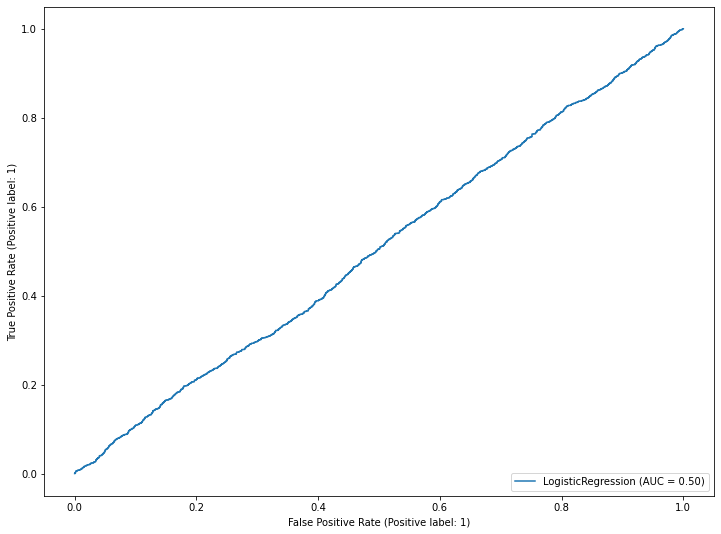

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, Y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_train, Y_train)#X_validation, Y_validation

Logistic Regression doesn't work very well for this problem! Having AUC<0.5 means that the classifier is worse than just randomly guessing the output. Need to find a classifier which can give an AUC>0.5 for this task! 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

y_random = np.random.randint(0,2,(X_train.shape[0]))

dt = RandomForestClassifier(random_state=RANDOM_SEED)
dt.fit(X_train,Y_train )

plot_roc_curve(dt, X_validation,Y_validation )

NameError: name 'np' is not defined

/Users/priyankademla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


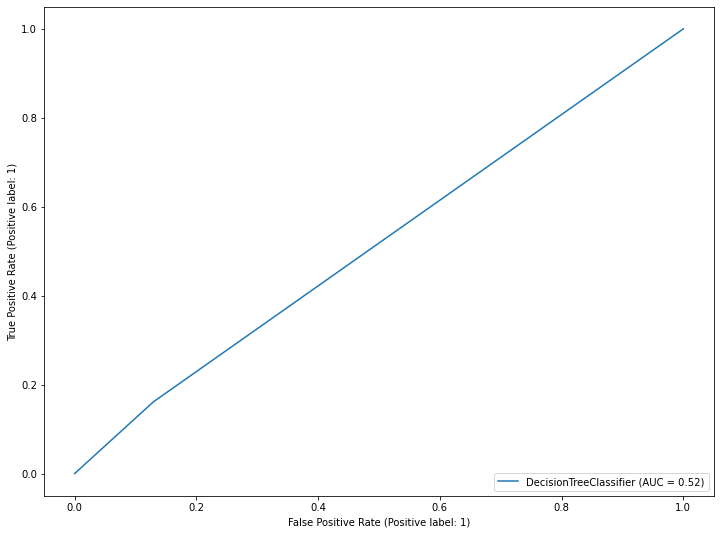

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train,Y_train)

plot_roc_curve(dt,X_validation,Y_validation)


/Users/priyankademla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


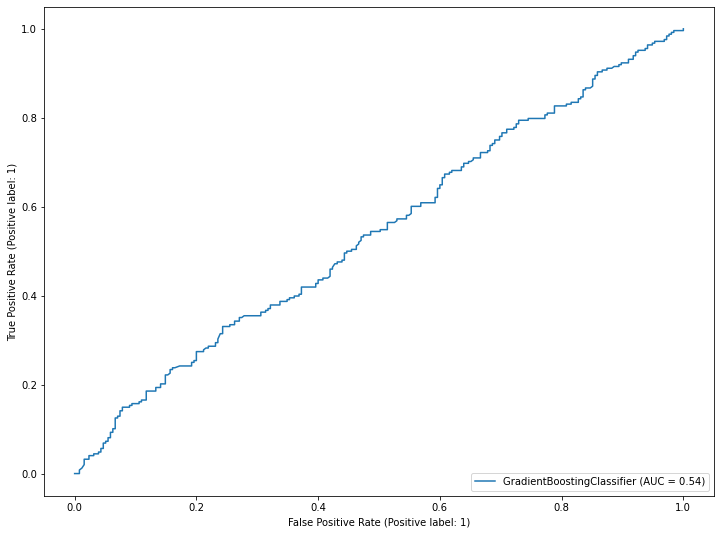

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = RANDOM_SEED)
gb.fit(X_train,Y_train)

plot_roc_curve(gb,X_validation,Y_validation)

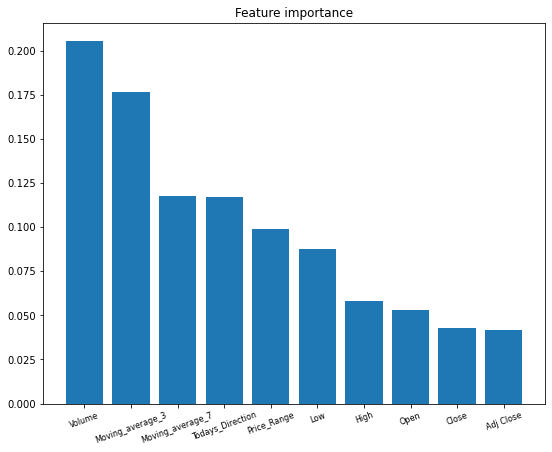

In [36]:
import numpy as np

importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]
_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)